In [1]:
import uproot
import matplotlib.pyplot as plt
import scipy as scp
from scipy.optimize import curve_fit 
from scipy.integrate import trapezoid
import numpy as np
import awkward as ak
import pandas as pd
from lmfit.models import GaussianModel, ExponentialModel, \
                         ThermalDistributionModel, StepModel #Modelli vari, l'ultimo è Fermi (o Bose)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def retta(x, a, b):
    return(a*x + b)

In [3]:
data=pd.read_excel("../Dati/linearity/cs/InterCalibrazione.xlsx", sheet_name='batch2' )
display(data)

,ch,val_1,err_stat_1,val_2,err_stat_2,val_3,err_stat_3,val_4,err_stat_4,val_5,err_stat_5,media,std,drift relativo,Drift relativo [%],Range,val_6,err_stat_6
0,0.0,NaN,NaN,-625.39,1.10,-623.0,1.30,-632.22,0.90,-632.50,1.10,-628.2775,0.163299,0.00026,0.025992,L,-632.70,1.12
1,1.0,NaN,NaN,-590.00,1.20,-586.0,1.30,-589.2,1.30,-589.10,1.00,-588.575,0.141421,0.00024,0.024028,NaN,-591.12,1.31
2,2.0,NaN,NaN,-2298.00,1.20,-2298.0,1.20,-2299.4,1.50,-2293.60,1.40,-2297.25,0.15,0.000065,0.00653,L,-2295.01,1.47
3,3.0,NaN,NaN,-1409.10,1.50,-1405.0,1.80,-1414,1.70,-1413.80,1.50,-1410.475,0.15,0.000106,0.010635,H,-1412.10,1.68
4,4.0,NaN,NaN,-946.60,1.30,-947.0,1.10,-951,1.20,-949.60,1.00,-948.55,0.129099,0.000136,0.01361,H,-952.76,2.00
5,5.0,NaN,NaN,-1584.60,2.00,-1585.0,2.30,-1582.7,2.20,-1583.20,2.40,-1583.875,0.170783,0.000108,0.010783,H,-1582.80,2.90
6,6.0,NaN,NaN,-1063.70,1.40,-1062.7,1.60,-1068.1,1.60,-1058.10,1.50,-1063.15,0.095743,0.00009,0.009006,L,-1063.49,1.89
7,7.0,NaN,NaN,-1581.10,2.10,-1580.0,2.00,-1578.7,1.80,-1573.70,1.70,-1578.375,0.182574,0.000116,0.011567,H,-1582.58,1.60
8,8.0,NaN,NaN,-1229.00,3.00,-1239.3,3.00,-1234.5,3.50,-1235.50,2.30,-1234.575,0.493288,0.0004,0.039956,H,-1234.51,2.21
9,9.0,NaN,NaN,-670.90,1.00,-672.1,1.10,-672.9,1.00,-668.02,0.84,-670.98,0.107548,0.00016,0.016029,NaN,-672.83,0.82


In [4]:
peak_cs=data['media'].dropna().drop(13)
peak_cs_err=data['std'].dropna().drop(13)

peak_cs_test=data['val_6'].dropna()
peak_cs_err_test=data['err_stat_6'].dropna()

In [5]:
channel_ref=3
ref_cs=peak_cs[channel_ref]
energia=np.abs(662/ref_cs)
coeff_cal=peak_cs/peak_cs[channel_ref]
print(coeff_cal)

0     0.445437
1     0.417289
2     1.628707
3          1.0
4     0.672504
5     1.122937
6     0.753753
7     1.119038
8      0.87529
9     0.475712
10    0.390454
11    0.609263
12    0.587196
14    1.017813
15    1.424431
Name: media, dtype: object


0    -3.948661
1    -1.942748
2      1.52381
3    -0.967262
4       -2.105
5      0.37069
6    -0.179894
7    -2.628125
8     0.029412
9    -2.256098
10   -1.583333
11         1.0
12    3.050781
14    0.306878
15    2.006122
dtype: object


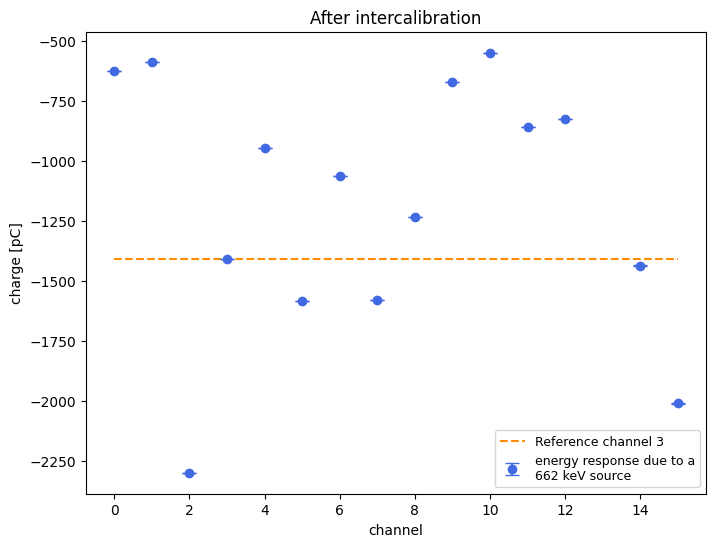

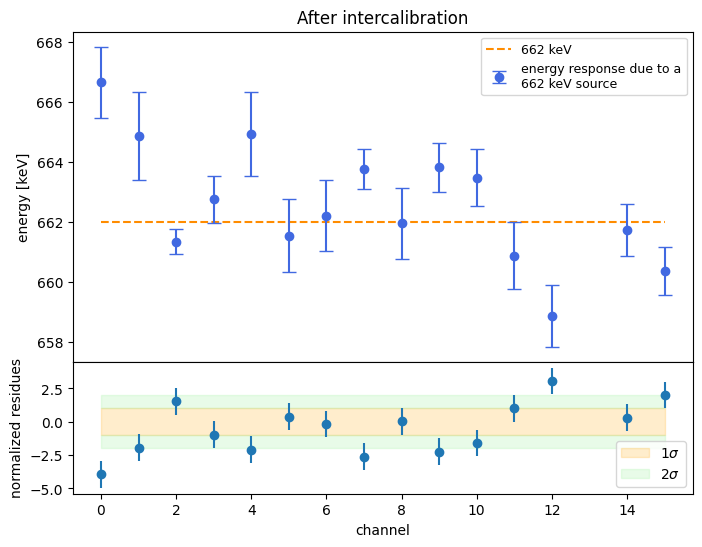

In [6]:
lista=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,14,15])
test_peak_centers=peak_cs_test/coeff_cal

test_peak_errors=peak_cs_err_test/coeff_cal
ref=peak_cs[channel_ref]

plt.figure(figsize=(8,6))
plt.plot(lista, 0*np.array(lista) + ref, color='darkorange', ls='--',label='Reference channel {} '.format(channel_ref))
plt.errorbar(lista, peak_cs, yerr=peak_cs_err, ls='', capsize=5, marker='o', color='royalblue', label='energy response due to a\n662 keV source')
plt.legend(fontsize=9)
plt.title("After intercalibration")
plt.ylabel("charge [pC]")
plt.xlabel('channel')
plt.savefig('bef_int.png')


#######################################################################################################################

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [5, 2]})

print( (test_peak_centers-ref)/test_peak_errors  )
ax1.plot(lista, 0*np.array(lista) + 662, color='darkorange', ls='--', label='662 keV '.format(channel_ref))
ax1.errorbar(lista, test_peak_centers*662/ref, yerr=test_peak_errors*662/np.abs(ref), ls='', capsize=5, marker='o', color='royalblue', label='energy response due to a\n662 keV source')
ax1.legend(fontsize=9)
ax1.set_title("After intercalibration")
ax1.set_ylabel("energy [keV]")

xlim = ax1.get_xlim()
ax2.errorbar(lista,(np.array(test_peak_centers)-ref)/np.array(test_peak_errors), yerr=1, ls=' ', marker='o')
ax2.fill_between([0,15], [-1, -1], [1, 1], color = "orange", alpha = 0.2, label = r'$1\sigma$')
ax2.fill_between([0,15], [-2, -2], [-1, -1], color = "lightgreen", alpha = 0.2, label = r'$2\sigma$')
ax2.fill_between([0,15], [2, 2], [1, 1], color = "lightgreen", alpha = 0.2)
ax2.set_xlabel("channel")
ax2.set_ylabel("normalized residues")
ax2.legend()
plt.subplots_adjust(hspace=0)

plt.legend(loc='lower right')
plt.savefig('af_int.png')

In [28]:
[print("{0} & {1} \\".format(j, coeff_cal[j])) for j in lista]


0 & 0.4454368209291197 \
1 & 0.41728850210035634 \
2 & 1.6287066413796771 \
3 & 1.0 \
4 & 0.6725039437069072 \
5 & 1.122937308353569 \
6 & 0.75375316825892 \
7 & 1.119037912759886 \
8 & 0.8752902391038481 \
9 & 0.4757120828089828 \
10 & 0.39045357060564706 \
11 & 0.6092628369875397 \
12 & 0.5871958028323793 \
14 & 1.0178131480529609 \
15 & 1.4244314858469664 \


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [7]:
#creo un dizionario con tutti i picchi per ogni canale
peaks=dict()
err=dict()
energy=dict()
peak_e=np.abs(np.array([-506.734, -461.730, -1673.738, -1085.422, -758.996, -1258.207, -854.866, -1216.707, -948.590, -506.800,
       -437.591, -776.004, -705.231, -1111.193, -1593.873]))
sigma_e=np.array([0.715, 0.789, 0.664, 0.844, 0.620, 1.360, 0.91, 1.116, 0.613, 1.236, 
         0.469, 0.955, 1.196, 1.043, 1.558])
peak_f=np.abs(np.array([-1216.816, -1142.936, -4043.482, -2679.389, -1825.805, -3077.995, -2076.421, -2938.099, -2288.095, -1217.833,
       -1056.445, -1899.582, -1726.943,  -2700.407, -3837.629] ))
sigma_f=np.array([1.615, 1.780, 2.493, 3.325, 1.683, 3.790, 2.369, 3.218, 1.281, 1.511,
        0.967, 2.157, 2.608,  2.604, 4.468])



peaks["ch_0"]=np.abs(np.array([-506.734, -1216.816, -359.830, -1092.329, -1237.615, peak_cs_test[0]])/coeff_cal[0]*energia)
energy["ch_0"]=np.array([511, 1274, (356.02*0.738+383.9*0.317)/(0.317+0.738), 1173.2, 1332.5, 662])
err["ch_0"]=np.array([0.715, 1.615, 0.792, 0.888, 0.932, peak_cs_err_test[0]])/coeff_cal[0]*energia

peaks["ch_1"]=np.abs([-461.730, -1142.936, -78.992, -315.134, -1042.832, -1186.104, peak_cs_test[1]])/coeff_cal[1]*energia
energy["ch_1"]=np.abs([511, 1274, 81,  (276.4*0.088+302.85*0.666)/(0.088+0.666) , 1173.2, 1332.5, 662])
err["ch_1"]= np.array([0.789, 1.780, 0.5, 1.049, 0.778, 0.782, peak_cs_err_test[1]])/coeff_cal[1]*energia

peaks["ch_2"]=np.abs([-1673.738, -4043.482, -122.249, -309.287, -1064.259,  -1245.953, -4059.473, 
                      -4612.032, peak_cs_test[2]])/coeff_cal[2]*energia
energy["ch_2"]=np.array([511, 1274, 30.85, 81, (276.4*0.088+302.85*0.666)/(0.088+0.666), (356.02*0.738+383.9*0.317)/(0.317+0.738), 1173.2, 1332.5,
                 662])
err["ch_2"]=np.array([ 0.664, 2.493, 0.141, 0.226, 2.641, 0.493, 2.224, 2.424, peak_cs_err_test[2]])/coeff_cal[2]*energia


ch=3
peaks["ch_3"]=np.abs([peak_e[ch], peak_f[ch], -75.484, -178.424, -753.299, -703.840, 
                      -2481.343, -2818.145, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_3"]=np.array([511, 1274, 30.85, 81, (356.02*0.738+383.9*0.317)/(0.317+0.738), (276.4*0.088+302.85*0.666)/(0.088+0.666), 
                         1173.2, 1332.5, 662])
err["ch_3"]= np.array([sigma_e[ch], sigma_f[ch], 0.708, 0.534, 0.969, 21.606, 1.929, 1.906, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=4
peaks["ch_4"]=np.abs([peak_e[ch], peak_f[ch], -53.037, -125.63, -516.241, -462.6, -1682.396, 
                      -1912.819, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_4"]=np.abs([511, 1274, 30.85, 81, (356.02*0.738+383.9*0.317)/(0.317+0.738), (276.4*0.088+302.85*0.666)/(0.088+0.666), 
                       1173.2, 1332.5, 662])
err["ch_4"]= np.array([sigma_e[ch], sigma_f[ch], 0.638, 0.307, 0.510, 6.676, 1.263,1.335, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=5
peaks["ch_5"]= np.abs([peak_e[ch], peak_f[ch], -202.278, -858.808,  -743.503, -2825.912, -3211.982, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_5"]=np.array([511, 1274, 81, (356.02*0.738+383.9*0.317)/(0.317+0.738), (276.4*0.088+302.85*0.666)/(0.088+0.666), 1173.2, 1332.5,
                 662])
err["ch_5"]=np.array([sigma_e[ch], sigma_f[ch], 1.504, 1.944, 16.012, 1.824, 1.873, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=6
peaks["ch_6"]=np.abs([peak_e[ch], peak_f[ch], -58.804,  -138.291, -534.679, -589.225, -1861.951, 
                      -2116.112, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_6"]=np.array([511, 1274, 30.85, 81,(276.4*0.088+302.85*0.666)/(0.088+0.666), (356.02*0.738+383.9*0.317)/(0.317+0.738), 1173.2, 1332.5,
                 662])
err["ch_6"]=np.array([sigma_e[ch], sigma_f[ch], 2.629, 0.771, 29.596, 0.957, 1.456, 2.037, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=7
peaks["ch_7"]=np.abs([peak_e[ch], peak_f[ch], -111.868, -209.736, -739.552, -862.497, -2730.948, -3093.398, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_7"]=np.array([511, 1274, 30.85, 81, (276.4*0.088+302.85*0.666)/(0.088+0.666), (356.02*0.738+383.9*0.317)/(0.317+0.738), 
                         1173.2, 1332.5, 662])
err["ch_7"]=np.array([sigma_e[ch], sigma_f[ch], 14.064, 1.772, 9.526, 1.196, 1.469, 1.497, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=8
peaks["ch_8"]=np.abs([peak_e[ch], peak_f[ch], -170.824, -666.152, -2170.299, -2453.222, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_8"]=np.array([511, 1274, 81,  (356.02*0.738+383.9*0.317)/(0.317+0.738), 1173.2, 1332.5, 662])
err["ch_8"]=np.array([sigma_e[ch], sigma_f[ch], 1.117, 1.321, 2.320, 2.595, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=9
peaks["ch_9"]=np.abs([peak_e[ch], peak_f[ch], -98.190, -362.576, -1195.544, -1332.633, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_9"]=np.array([511, 1274, 81, (356.02*0.738+383.9*0.317)/(0.317+0.738),  1173.2, 1332.5, 662])
err["ch_9"]=np.array([sigma_e[ch], sigma_f[ch], 0.283, 0.501, 1.738, 2.593, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=10
peaks["ch_10"]=np.abs([peak_e[ch], peak_f[ch], -79.969, -305.726, -958.436, -1082.134, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_10"]=np.array([511, 1274, 81, (356.02*0.738+383.9*0.317)/(0.317+0.738), 1173.2, 1332.5, 662])
err["ch_10"]=np.array([sigma_e[ch], sigma_f[ch], 0.349, 0.854, 0.547, 0.982, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=11
peaks["ch_11"]=np.abs([peak_e[ch], peak_f[ch], -124.268, -511.263, -1620.388, -1838.495, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_11"]=np.array([511, 1274, 81, (356.02*0.738+383.9*0.317)/(0.317+0.738), 1173.2, 1332.5, 662])
err["ch_11"]=np.array([sigma_e[ch], sigma_f[ch], 0.508, 2.282, 1.427, 1.351, peak_cs_err_test[ch]])/coeff_cal[ch]*energia

ch=12
peaks["ch_12"]=np.abs([peak_e[ch], peak_f[ch], -133.19, -538.702, -1607.294, -1813.730, peak_cs_test[ch]])/coeff_cal[ch]*energia
energy["ch_12"]=np.array([511, 1274, 81, (356.02*0.738+383.9*0.317)/(0.317+0.738), 1173.2, 1332.5, 662])
err["ch_12"]=np.array([sigma_e[ch], sigma_f[ch],0.668, 1.556, 2.239, 2.387, peak_cs_err_test[ch]])/coeff_cal[ch]*energia


ch=13
peaks["ch_14"]=np.abs([peak_e[ch], peak_f[ch], -83.928,  -184.194, -777.060, -2464.399, -2790.467, peak_cs_test[ch+1]])/coeff_cal[ch+1]*energia
energy["ch_14"]=np.array([511, 1274, 30.85, 81, (356.02*0.738+383.9*0.317)/(0.317+0.738), 1173.2, 1332.5, 662])
err["ch_14"]=np.abs([sigma_e[ch], sigma_f[ch], 1.30, 0.634, 0.558, 1.811, 2.038, peak_cs_err_test[ch+1]])/coeff_cal[ch+1]*energia

ch=14
peaks["ch_15"]=np.abs([peak_e[ch], peak_f[ch], -112.397, -265.353, -925.429, -1088.382, -3526.869, 
                       -3991.849, peak_cs_test[ch+1]])/coeff_cal[ch+1]*energia
energy["ch_15"]=np.array([511, 1274, 30.85, 81, (276.4*0.088+302.85*0.666)/(0.088+0.666), (356.02*0.738+383.9*0.317)/(0.317+0.738), 
                          1173.2, 1332.5,662])
err["ch_15"]=np.array([sigma_e[ch], sigma_f[ch], 0.973, 1.021, 5.45, 1.114, 2.461, 2.509, peak_cs_err_test[ch+1]])/coeff_cal[ch+1]*energia

In [18]:
3%3


0

ch    a     b;      y=ax+b
0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
4 0
4 2
5 0


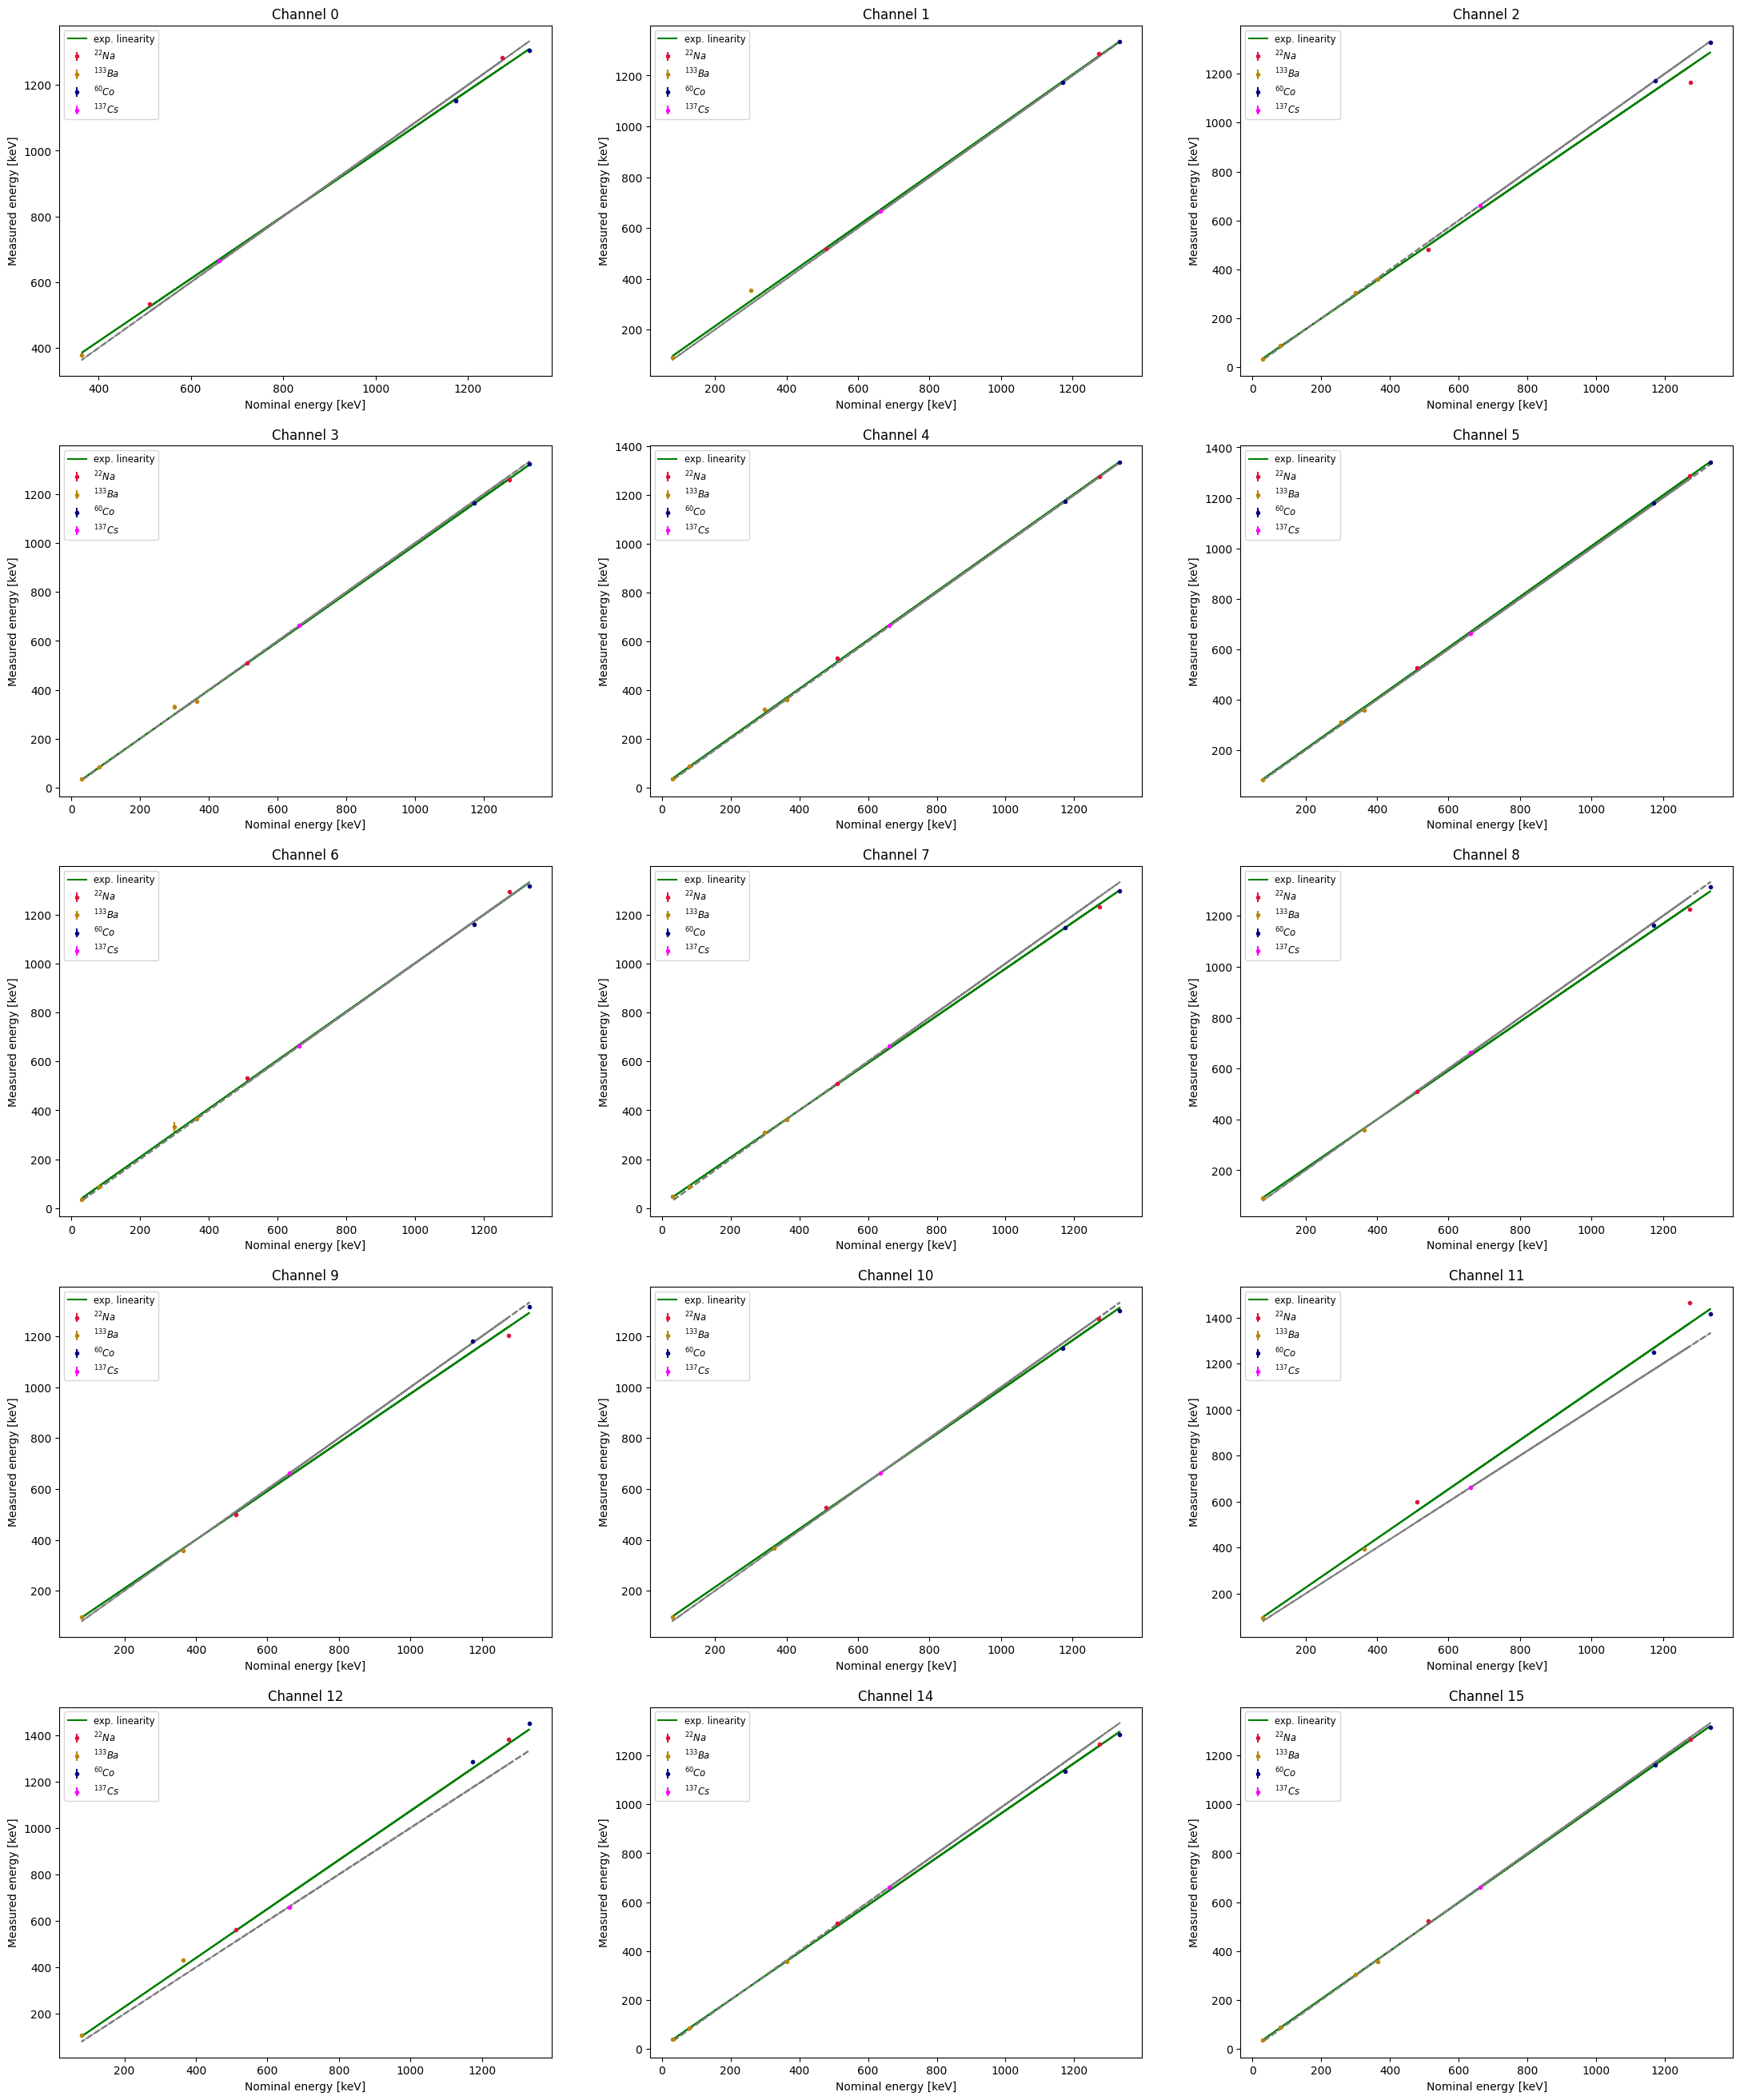

In [23]:

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(27, 33))#, sharex=True)  #fare graf. grande


# Iterate over each element in channels
print("ch    a     b;      y=ax+b")
for j in lista:
    # Calculate subplot row and column
    row = j // 3
    col = j % 3
    print(row, col)
    ch="ch_"+str(j)
    # Plot error bars on the corresponding subplot with different color
    par, cov= curve_fit(retta, energy[ch], peaks["ch_"+str(j)], sigma=err["ch_"+str(j)])
    #print("{2} & {0} & {1} \\".format(par, cov, j))
    if j==14 or j==15:
        row = (j-1) // 3
        col = (j-1) % 3
    axes[row, col].set_title("Channel {}".format(j))
    axes[row, col].errorbar(energy["ch_"+str(j)], energy["ch_"+str(j)], ls='--', color='gray')
    
    axes[row, col].errorbar(energy["ch_"+str(j)][0:2], peaks["ch_"+str(j)][0:2], yerr= err["ch_"+str(j)][0:2],color='crimson', 
                            label='$^{22}Na$', marker='.', linestyle=' ')
    axes[row, col].errorbar(energy["ch_"+str(j)][2:-3], peaks["ch_"+str(j)][2:-3], yerr= err["ch_"+str(j)][2:-3], color='darkgoldenrod', 
                            label='$^{133}Ba$', marker='.', linestyle=' ')
    axes[row, col].errorbar(energy["ch_"+str(j)][-3:-1], peaks["ch_"+str(j)][-3:-1], yerr= err["ch_"+str(j)][-3:-1], color='navy', 
                            label='$^{60}Co$', marker='.', linestyle=' ')
    axes[row, col].errorbar(energy[ch][-1], peaks[ch][-1], yerr=err[ch][-1],color='magenta', 
                            label='$^{137}Cs$', marker='.', linestyle=' ')
    axes[row, col].plot(energy["ch_"+str(j)], retta(energy["ch_"+str(j)], par[0], par[1]), color='green', label='exp. linearity')
    
    axes[row, col].set_xlabel("Nominal energy [keV]")
    axes[row, col].set_ylabel("Measured energy [keV]")
    axes[row, col].legend(fontsize='small')  # Add legend for each subplot

plt.savefig("linerity.png")